In [1]:
import xarray as xr
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
var_path = '/user/work/al18709/tc_data_var'
mswep_path = '/user/work/al18709/tc_data_mswep'

In [3]:
X_mslp = np.load(var_path + '/mslp_train_X.npy')
X_q = np.load(var_path + '/q-925_train_X.npy')
X_u200 = np.load(var_path + '/u-200_train_X.npy')
meta_u200 = pd.read_csv(var_path + '/u-200_train_meta.csv')
X_v200 = np.load(var_path + '/v-200_train_X.npy')
X_u850 = np.load(var_path + '/u-850_train_X.npy')
X_v850 = np.load(var_path + '/v-850_train_X.npy')
X_mswep = np.load(mswep_path + '/train_X.npy')
y_mswep = np.load(mswep_path + '/train_y.npy')
meta = pd.read_csv(mswep_path + '/train_meta.csv')
meta_t = pd.read_csv(('/user/work/al18709/tc_data_t/train_meta.csv'))
X_t = np.load('/user/work/al18709/tc_data_t/train_y.npy')


32.1
123.775
32.1
123.775
32.1
123.775
2002178N10139


/user/work/al18709/.conda/envs/aquatic/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


[[Text(-25.0, 0, ''),
  Text(0.0, 0, ''),
  Text(25.0, 0, ''),
  Text(50.0, 0, ''),
  Text(75.0, 0, ''),
  Text(100.0, 0, '')],
 [Text(0, -20.0, ''),
  Text(0, 0.0, ''),
  Text(0, 20.0, ''),
  Text(0, 40.0, ''),
  Text(0, 60.0, ''),
  Text(0, 80.0, ''),
  Text(0, 100.0, '')]]

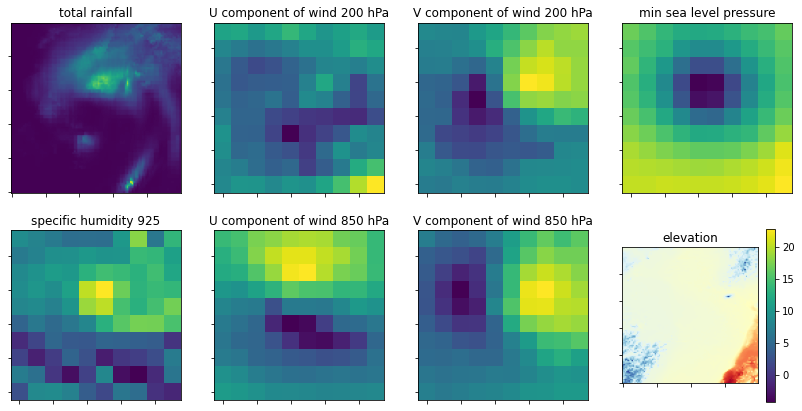

In [13]:
i = 100 # good pattern on ERA5 data but no elevation
i = 25547
print(meta['centre_lat'][i])
print(meta['centre_lon'][i])
print(meta_t['centre_lat'][i])
print(meta_t['centre_lon'][i])
print(meta_u200['centre_lat'][i])
print(meta_u200['centre_lon'][i])
print(meta['sid'][i])

# print(meta)
# print(meta_t)

fig, axes = plt.subplots(2, 4, figsize=(14, 7), sharey=False)

axes[0,0].imshow(y_mswep[i,:,:],origin='lower')
axes[0,0].set_title('total rainfall')
axes[0,0].set(xticklabels=[],yticklabels=[])

axes[1,0].imshow(X_q[i,:,:],origin='lower')
axes[1,0].set_title('specific humidity 925')
axes[1,0].set(xticklabels=[],yticklabels=[])

im = axes[0,1].imshow(X_u200[i,:,:],origin='lower')
axes[0,1].set_title('U component of wind 200 hPa')
axes[0,1].set(xticklabels=[],yticklabels=[])
# cb = fig.colorbar(im)

axes[0,2].imshow(X_v200[i,:,:],origin='lower')
axes[0,2].set_title('V component of wind 200 hPa')
axes[0,2].set(xticklabels=[],yticklabels=[])

axes[1,1].imshow(X_u850[i,:,:],origin='lower')
axes[1,1].set_title('U component of wind 850 hPa')
axes[1,1].set(xticklabels=[],yticklabels=[])

axes[1,2].imshow(X_v850[i,:,:],origin='lower')
axes[1,2].set_title('V component of wind 850 hPa')
axes[1,2].set(xticklabels=[],yticklabels=[])

axes[0,3].imshow(X_mslp[i,:,:],origin='lower')
axes[0,3].set_title('min sea level pressure')
axes[0,3].set(xticklabels=[],yticklabels=[])

axes[1,3].imshow(X_t[i,:,:],origin='lower',cmap = 'RdYlBu')
axes[1,3].set_title('elevation')
axes[1,3].set(xticklabels=[],yticklabels=[])


In [5]:
print(np.sum(X_t))

0.0


In [6]:
top = xr.load_dataset('/user/home/al18709/work/topography/topography_10km_nn.nc')

In [7]:
print(np.sum(top.z.values >= 0))

1892796


In [8]:
print(np.sum(X_u850-X_u200))

-9875033.486995094


In [9]:
u_200 = xr.load_dataset('/bp1store/geog-tropical/data/ERA-5/hour/u/200/ERA5_u_3hourly_1deg_202112.nc')
u_850 = xr.load_dataset('/bp1store/geog-tropical/data/ERA-5/hour/v/850/ERA5_v_3hourly_1deg_202112.nc')

In [12]:
print(u_200)
# 

<xarray.Dataset>
Dimensions:  (time: 248, lon: 360, lat: 180)
Coordinates:
  * time     (time) datetime64[ns] 2021-12-01 ... 2021-12-31T21:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    u        (time, lat, lon) float32 1.345 1.32 1.292 ... -13.47 -13.24 -13.0
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Jan 10 23:22:57 2023: cdo remapbil,r360x180 /bp1store/g...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...


In [13]:
print(u_850)

<xarray.Dataset>
Dimensions:  (time: 248, lon: 360, lat: 180, level: 6)
Coordinates:
  * time     (time) datetime64[ns] 2021-12-01 ... 2021-12-31T21:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * level    (level) float64 1e+03 850.0 700.0 500.0 400.0 300.0
Data variables:
    v        (time, level, lat, lon) float32 -1.084 -1.147 -1.21 ... 18.78 19.09
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sun Apr 10 18:45:44 2022: cdo remapbil,r360x180 /bp1store/g...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...


In [10]:
top2 = xr.load_dataset('/user/work/al18709/tropical_cyclones/topography/ZUMAN_1998087S15172_hour-9_idx-47189_cat-0_basin-SP_centrelat--20.4597_centrelon-165.542.nc')

In [12]:
print(np.sum(top2.elevation.values))

-26374591


In [13]:
top3 = np.load('/user/work/al18709/tc_Xy_topography/y_2006340N08142.npy')

In [15]:
print(np.sum(top3))

-1363838825.0


In [16]:
print(X_t)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [17]:
y_t = np.load('/user/work/al18709/tc_data_t/train_y.npy')
X_t = np.load('/user/work/al18709/tc_data_t/train_X.npy')

In [18]:
print(X_t)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [2]:
# number of files in tropical_cyclones/topography,tc_Xy_topography
# 97952 -> 99741,3774

# number of files in tropical_cyclones/mswep ,tc_Xy
# 89856,5610

# number of files in tropical_cyclones/var, tc_Xy_var
# 97813,3774

print(np.load('/user/home/al18709/work/tc_data_flipped/train_combined_X.npy').shape)
print(np.load('/user/home/al18709/work/tc_data_flipped/train_combined_y.npy').shape)


(45623, 10, 10, 7)
(45623, 100, 100)


In [3]:
print(np.load('/user/home/al18709/work/tc_data_flipped_t/train_y.npy').shape)

(45623, 100, 100)
